In [87]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from random import randint

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)


#Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler


#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [13]:
raw_df = pd.read_csv('LoanStats3a.csv', parse_dates=["issue_d", "earliest_cr_line", "last_pymnt_d"]) #read training data

In [31]:
raw_df_sorted = raw_df.sort_values("issue_d").drop(columns=["next_pymnt_d", "emp_title"])

In [32]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [36]:
# Now I will use the 'mean' technique to fill the NaN values.

raw_df_sorted['pub_rec_bankruptcies'].fillna(raw_df_sorted['pub_rec_bankruptcies'].mean(), inplace=True)
missing_values_table(raw_df_sorted)

Your selected dataframe has 47 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
emp_length,1115,2.6
chargeoff_within_12_mths,148,0.3
collections_12_mths_ex_med,148,0.3
tax_liens,108,0.3
revol_util,93,0.2
acc_now_delinq,32,0.1
total_acc,32,0.1
delinq_amnt,32,0.1
delinq_2yrs,32,0.1
pub_rec,32,0.1


In [38]:
emp_len_types = raw_df_sorted.emp_length.unique()

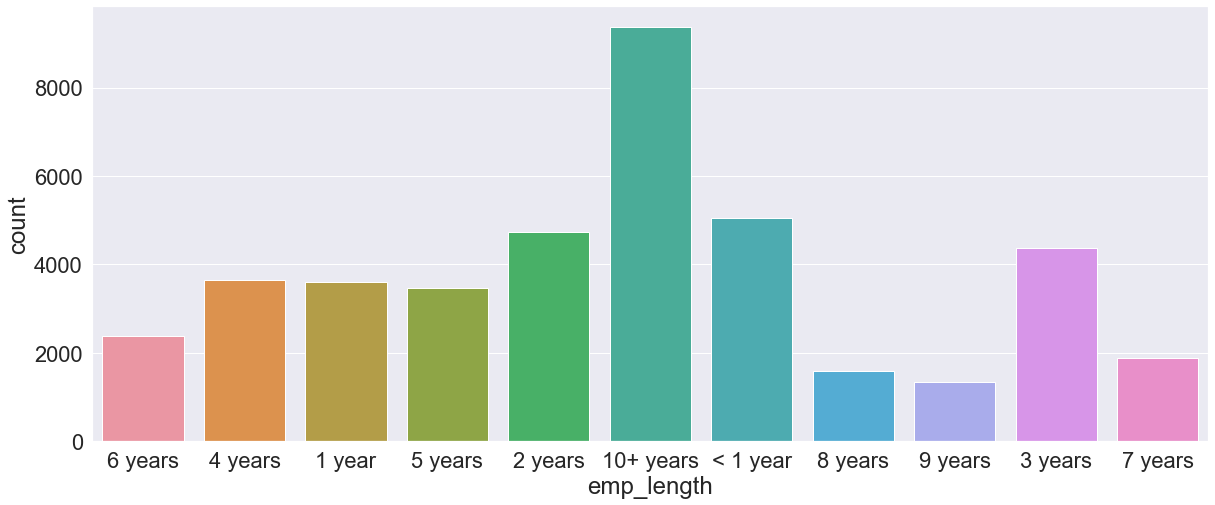

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(raw_df_sorted['emp_length'])

In [55]:
# randomly insert categories in the missing values

for i in raw_df_sorted['emp_length'][raw_df_sorted['emp_length'].isnull() == True].index:
    raw_df_sorted['emp_length'][i] = emp_len_types[randint(0, emp_len_types.size -1)]
    
missing_values_table(raw_df_sorted)

Your selected dataframe has 47 columns.
There are 42 columns that have missing values.


,Missing Values,% of Total Values
collections_12_mths_ex_med,148,0.3
chargeoff_within_12_mths,148,0.3
tax_liens,108,0.3
revol_util,93,0.2
pub_rec,32,0.1
delinq_amnt,32,0.1
acc_now_delinq,32,0.1
total_acc,32,0.1
delinq_2yrs,32,0.1
inq_last_6mths,32,0.1


In [71]:
cols = missing_values_table(raw_df_sorted).iloc[:, :0]
cols.iloc[2].name

Your selected dataframe has 47 columns.
There are 42 columns that have missing values.


'tax_liens'

In [79]:
for i in range(42):
    col_name = cols.iloc[i].name
    for j in raw_df_sorted[col_name][raw_df_sorted[col_name].isnull() == True].index:
        raw_df_sorted.drop(labels=j, inplace=True)

In [82]:
raw_df_sorted.to_csv("processed/df_sorted.csv", index = False)

In [86]:
raw_df_sorted.

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
30937,13000.0,13000.0,11525.000000,36 months,10.62%,423.28,B,B3,6 years,RENT,86000.0,Not Verified,10-Apr,Fully Paid,n,debt_consolidation,debt consolidation,12.35,0.0,3-Mar,0.0,10.0,0.0,9871.0,45.60%,23.0,f,0.0,0.0,15161.065730,13440.86,13000.0,2161.07,0.0,0.0,0.0,12-Oct,2907.14,19-Mar,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
30698,7000.0,7000.0,6785.947887,36 months,7.51%,217.77,A,A4,4 years,RENT,80000.0,Source Verified,10-Apr,Fully Paid,n,major_purchase,Protect Dad Loan,14.88,0.0,Aug-95,0.0,10.0,1.0,8433.0,41.30%,17.0,f,0.0,0.0,7838.664792,7582.93,7000.0,838.66,0.0,0.0,0.0,13-Apr,455.06,17-Oct,0.0,1.0,Individual,0.0,0.0,0.0,1.0,0.0
30697,12000.0,12000.0,11196.564730,36 months,10.25%,388.62,B,B2,1 year,RENT,48645.0,Not Verified,10-Apr,Fully Paid,n,debt_consolidation,Debt Consolidation,13.64,0.0,Mar-00,0.0,10.0,0.0,13039.0,31%,17.0,f,0.0,0.0,13922.041770,12966.90,12000.0,1922.04,0.0,0.0,0.0,12-Nov,2701.47,18-Jul,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
30696,22750.0,22750.0,21931.621590,36 months,11.36%,748.73,B,B5,5 years,RENT,58600.0,Not Verified,10-Apr,Fully Paid,n,debt_consolidation,Seth's loan,24.66,0.0,Mar-98,1.0,8.0,0.0,1449.0,29.60%,37.0,f,0.0,0.0,25428.895730,24460.37,22750.0,2678.90,0.0,0.0,0.0,11-Aug,14957.35,19-Jun,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
30695,15500.0,15500.0,15500.000000,36 months,16.45%,548.36,E,E1,2 years,MORTGAGE,415000.0,Not Verified,10-Apr,Fully Paid,n,credit_card,credit consolidation,0.68,0.0,Oct-93,2.0,11.0,0.0,11886.0,56.30%,31.0,f,0.0,0.0,19418.699580,19418.70,15500.0,3918.70,0.0,0.0,0.0,12-Aug,5188.83,19-Jun,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
